# Datasets & Dataloaders

In [4]:
# PyTorch provides two data primitives
# torch.utils.data.DataLoader
# torch.utils.data.Dataset

# Both allow you to use pre-loaded datasets as well as your own data

# Dataset: stores the samples and their corresponding labels
# DataLoader: wraps an iterable around the Dataset to enable easy access to the samples 

# Loading a Dataset

In [5]:
# We load the FashionMNIST Dataset with the following parameters:
# - root: Is the path where the train/test data is stored
# - train: Specifies traning or test dataset
# - download=True: Downloads the data from the internet if its's not available as root
# - transform, and target_transform specify the feature and label transformations
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# Iterating and Visualizing the Dataset

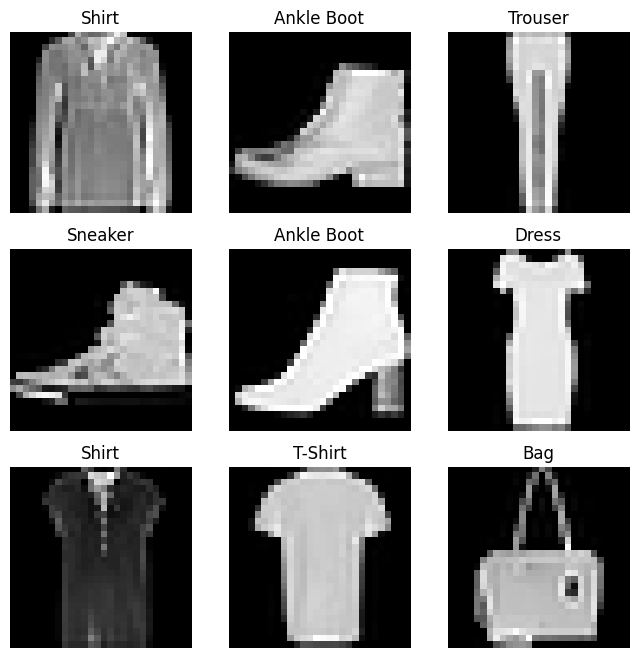

In [10]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))

cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


# Creating a Custom Dataset for your files

In [7]:
# A custom dataset must implement these three functions __init__, __len__, and __getitem__ 

import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    # Run once when instantiating the Dataset object. We initialize the directory
    # containing the images, the annotations file, and both transform
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    # Returns the number of samples in our dataset
    def __len__(self):
        return len(self.img_labels)

    # Loads and returns a sample from the dataset at the given idx
    # Based on the index, it identifies the image's location on disk
    # converts that to a tensor using `read_image`, retrieves the 
    # corresponding label from the csv data in `self.img_labels`
    # calls the transform function on them and returns the tensor image
    # and corresponding label in a tuple
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# Preparing your data for training with DataLoaders

In [8]:
# The dataset retrieves our dataset's features and labels one sample at a time. 
# While training a model we typically want to pass samples in "minibatches", reshuffle the 
# data at every epoch to reduce model overfitting 

# DataLoader: Is an iterable that abstracts this complexity for us in an easy API
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Iterate through the DataLoader

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


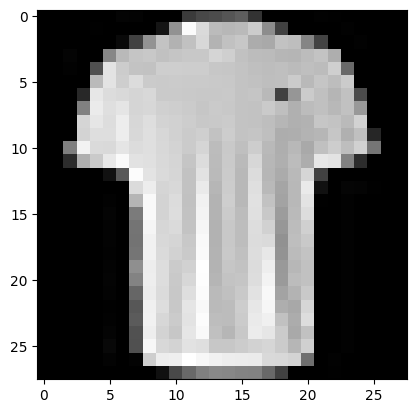

Label: 0


In [9]:
# Now we have loaded the dataset into the `DataLoader` and can iterate through the dataset 
# as needed. Each iteration below returns a batch of `train_features`, and train_labels
# Display image and label.

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")